In [1]:
import numpy as np 
import pandas as pd
import os 

In [205]:
train_x = np.load('训练集/train_x.npy')
train_y = np.load('训练集/train_y.npy')
test_x = np.load('测试集A/test_x_A.npy')
sample_submit = pd.read_csv('测试集A/submit_example_A.csv', index_col=0)

In [221]:
(train_x[idx,0].mean(axis = 0)).shape       

(180,)

In [222]:
print(train_x.shape, train_y.shape, test_x.shape)
for _ in np.unique(train_y):
    idx = (train_y == _)
    print(train_x[idx,0].mean(axis = 0).mean())
    print((train_x[idx,0].mean(axis = 1) > 94).sum()/idx.sum())
    print(f'{_}: {(train_y == _).sum()}')             
                                                                                                                                                                                                              

(37549, 2, 180) (37549,) (1155, 2, 180)
95.03142034949605
0.7674449812130971
0: 29808
93.50708372141158
0.5461036945048122
1: 3221
93.20066617502457
0.4342920353982301
2: 4520


In [187]:
def feature_concat(data):
    ##  input: data, np.array (n,2,180)
    ##  output: concat feature  (n,360)
    ##  data[:,0,:]:  blood oxygen  data[:,1,:]: heart rate

    bo = data[:,0,:]
    hr = data[:,1,:]
    new_data = np.concatenate([bo, hr], axis = 1)
    return new_data

def ratio_feature(data):
    ## input: data, np.array (n,2,180)
    ## output: ratio feature(n,180)
    ## data[:,0,:]/data[:,1,:]
    bo = data[:,0,:]
    hr = data[:,1,:]
    ratio = bo/hr
    return ratio

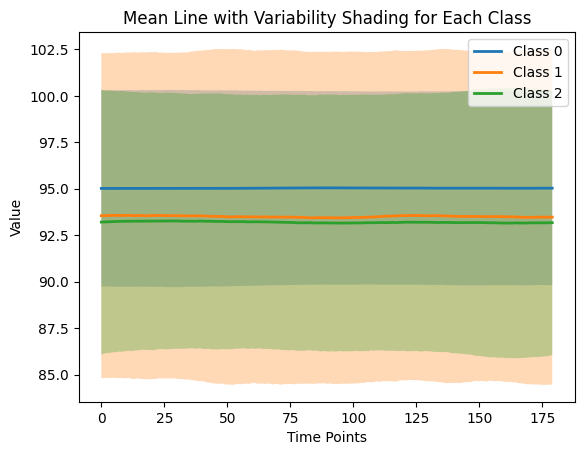

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 data 是您的数据，labels 是对应的类别标签
# data = np.array([...])  # 您的数据
# labels = np.array([...])  # 每一行对应的数据类别

# 示例数据
np.random.seed(0)
data = train_x[:,0,:]  # 假设有30个样本，每个样本有10个时间点的数据
labels = train_y  # 3类样本，每类10个

# 对每类数据进行处理
unique_labels = np.unique(labels)
time_points = np.arange(data.shape[1])

fig, ax = plt.subplots()

for label in unique_labels:
    # 选择当前类别的所有样本
    samples_of_label = data[labels == label]
    
    # 计算均值和标准差
    mean_values = np.mean(samples_of_label, axis=0)
    std_dev = np.std(samples_of_label, axis=0)
    
    # 绘制均值线
    ax.plot(time_points, mean_values, label=f'Class {label}', linewidth=2)
    
    # 使用阴影表示变化幅度（这里使用标准差的两倍作为范围）
    ax.fill_between(time_points, mean_values - 2*std_dev, mean_values + 2*std_dev, alpha=0.3)

# 设置图表属性
ax.set_xlabel('Time Points')
ax.set_ylabel('Value')
ax.set_title('Mean Line with Variability Shading for Each Class')
ax.legend()

# 显示图表
plt.show()

C:\Users\sunrui\AppData\Local\Temp\ipykernel_22268\2129601138.py:29: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(colors, [f'Class {i}' for i in unique_labels])


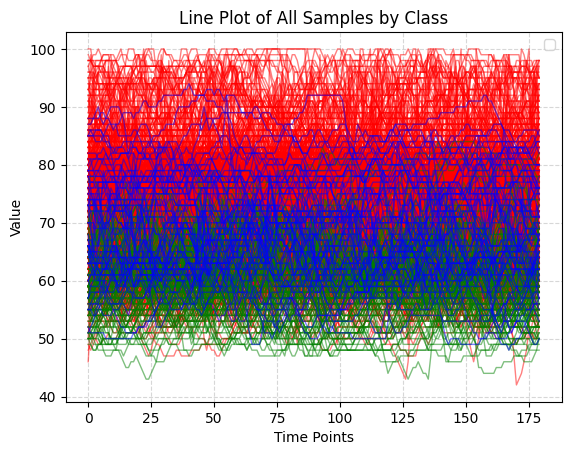

In [211]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 data 是您的数据，labels 是对应的类别标签
# data = np.array([...])  # 您的数据
# labels = np.array([...])  # 每一行对应的数据类别

# 示例数据
np.random.seed(0)
data = train_x[:1000,1,:]  # 假设有30个样本，每个样本有10个时间点的数据
labels = train_y[:1000]  # 3类样本，每类10个

# 确定颜色对应于不同的类别
colors = ['r', 'g', 'b']  # 分别为类别0、1、2定义颜色

fig, ax = plt.subplots()

# 绘制每个样本的折线图
for label, color in zip(unique_labels, colors):
    # 选择当前类别的所有样本
    samples_of_label = data[labels == label]
    for sample in samples_of_label:
        ax.plot(time_points, sample, color=color, alpha=0.5, linewidth=1)

# 设置图表属性
ax.set_xlabel('Time Points')
ax.set_ylabel('Value')
ax.set_title('Line Plot of All Samples by Class')
ax.legend(colors, [f'Class {i}' for i in unique_labels])

# 添加网格线以增强可读性
ax.grid(True, which="both", ls="--", alpha=0.5)

# 显示图表
plt.show()

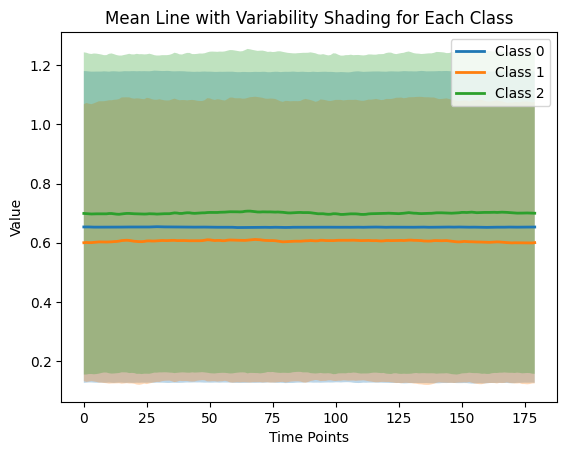

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 data 是您的数据，labels 是对应的类别标签
# data = np.array([...])  # 您的数据
# labels = np.array([...])  # 每一行对应的数据类别

# 示例数据
np.random.seed(0)
data = (train_x[:,1,:] - 40)/40 # 假设有30个样本，每个样本有10个时间点的数据
labels = train_y  # 3类样本，每类10个

# 对每类数据进行处理
unique_labels = np.unique(labels)
time_points = np.arange(data.shape[1])

fig, ax = plt.subplots()

for label in unique_labels:
    # 选择当前类别的所有样本
    samples_of_label = data[labels == label]
    
    # 计算均值和标准差
    mean_values = np.mean(samples_of_label, axis=0)
    std_dev = np.std(samples_of_label, axis=0)
    
    # 绘制均值线
    ax.plot(time_points, mean_values, label=f'Class {label}', linewidth=2)
    
    # 使用阴影表示变化幅度（这里使用标准差的两倍作为范围）
    ax.fill_between(time_points, mean_values - 2*std_dev, mean_values + 2*std_dev, alpha=0.3)

# 设置图表属性
ax.set_xlabel('Time Points')
ax.set_ylabel('Value')
ax.set_title('Mean Line with Variability Shading for Each Class')
ax.legend()

# 显示图表
plt.show()

In [132]:
import lightgbm as lgb 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [190]:
train_data = feature_concat(train_x)
test_data = feature_concat(test_x) 

ratio_train = ratio_feature(train_x)
ratio_test = ratio_feature(test_x)

train_data = np.concatenate([train_data, ratio_train], axis = 1)
test_data = np.concatenate([test_data, ratio_test], axis = 1)
print(train_data.shape, test_data.shape)

train_X, dev_X,  train_label, dev_label = train_test_split(train_data, train_y,random_state=42, test_size=0.1, stratify= train_y)

(37549, 540) (1155, 540)


In [196]:
lgb_train = lgb.Dataset(train_X, train_label)
lgb_dev = lgb.Dataset(dev_X, dev_label, reference=lgb_train)
lgb_params = {'learning_rate': 0.1, 'max_depth': -1, 'min_child_weight': 1,
            'colsample_bytree': 1, 'subsample': 1, 'reg_lambda': 0.5, 'reg_alpha': 0.5,'num_leaves':31,
            'seed': 33,'verbose':1,  'objective':'multiclass' , 'num_class': 3}  # l1 class 8,l2 class 31

record = {}
gbm = lgb.train(lgb_params, lgb_train, num_boost_round= 200,valid_sets=[lgb_train, lgb_dev],
                callbacks=[lgb.record_evaluation(record)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 62639
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 540
[LightGBM] [Info] Start training from score -0.230874
[LightGBM] [Info] Start training from score -2.455917
[LightGBM] [Info] Start training from score -2.117132


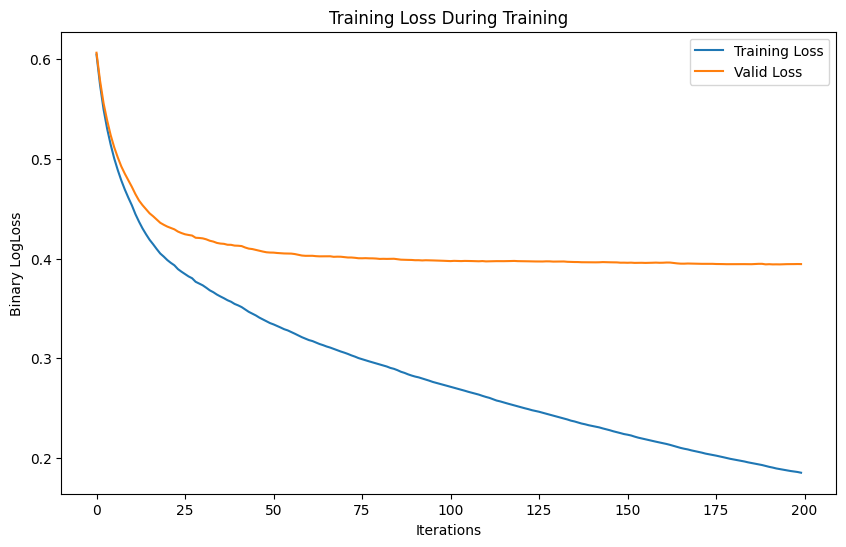

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(list(record['training']['multi_logloss']), label='Training Loss')
plt.plot(list(record['valid_1']['multi_logloss']), label='Valid Loss')
plt.title('Training Loss During Training')
plt.xlabel('Iterations')
plt.ylabel('Binary LogLoss')
plt.legend()
plt.show()

In [198]:
res = gbm.predict(dev_X)
pred_label = np.argmax(res, axis = 1)

print(f'if pred all zero, accuracy is {(dev_label == 0).sum()/(dev_label.shape[0])}')
print(f'if pred all one, accuracy is {(dev_label == 1).sum()/(dev_label.shape[0])}')
print(f'if pred all two, accuracy is {(dev_label == 2).sum()/(dev_label.shape[0])}')

if pred all zero, accuracy is 0.7938748335552597
if pred all one, accuracy is 0.08575233022636485
if pred all two, accuracy is 0.1203728362183755


In [199]:
def to_one_hot(y, num_classes=None):
    """
    将分类标签转换为one-hot编码形式。
    
    参数:
    y -- 一维整数数组，包含分类预测结果。
    num_classes -- 类别的总数。如果未提供，则从y中自动推断。
    
    返回:
    one_hot_matrix -- 二维数组，表示one-hot编码的预测矩阵。
    """
    if num_classes is None:
        num_classes = np.max(y) + 1
    one_hot_matrix = np.zeros((len(y), num_classes))
    one_hot_matrix[np.arange(len(y)), y] = 1
    return one_hot_matrix

dev_true = to_one_hot(dev_label, 3)
dev_pred = to_one_hot(pred_label, 3)

In [200]:
from sklearn.metrics import accuracy_score, roc_auc_score 
print(f' acc score {accuracy_score(dev_label, pred_label)}')
print(f" roc_auc score {roc_auc_score(dev_true, dev_pred, average=None)}")
print(dev_pred.sum(axis = 0), dev_true.sum(axis = 0))
print(f' acc score in class 0: {accuracy_score(dev_true[:,0], dev_pred[:,0])}')
print(f' acc score in class 1: {accuracy_score(dev_true[:,1], dev_pred[:,1])}')
print(f' acc score in class 2: {accuracy_score(dev_true[:,2], dev_pred[:,2])}')

 acc score 0.8540612516644474
 roc_auc score [0.76271381 0.66963777 0.66817609]
[3274.  188.  293.] [2981.  322.  452.]
 acc score in class 0: 0.8905459387483355
 acc score in class 1: 0.925965379494008
 acc score in class 2: 0.8916111850865512


In [172]:
res = gbm.predict(test_data)
pred_label = np.argmax(res, axis = 1)

In [173]:
for _ in np.unique(pred_label):
    print(f'{_}: {(pred_label == _).sum()}')

0: 833
1: 197
2: 125


In [174]:
pred_label = np.array([0]*test_x.shape[0])

top_385_indices = res[:,2].argsort()[::-1][:385]
pred_label[top_385_indices] = 2

tmp_res = res.copy()
tmp_res[top_385_indices,1] = 0

top_385_indices = tmp_res[:,1].argsort()[::-1][:385]
pred_label[top_385_indices] = 1

for _ in np.unique(pred_label):
    print(f'{_}: {(pred_label == _).sum()}')

0: 385
1: 385
2: 385


In [176]:
sample_submit.loc[:,'label'].value_counts()

label
2    385
1    385
0    385
Name: count, dtype: int64

In [175]:
sample_submit.loc[:,'label'] = pred_label
sample_submit.to_csv('res_3.csv')

In [156]:
res = gbm.predict(test_data)
pred_label = np.argmax(res, axis = 1)
sample_submit.loc[:,'label'] = pred_label
sample_submit.to_csv('res_1.csv')

In [177]:
import joblib

# 保存
joblib.dump(gbm, "model/lgb_0620.pkl")
# 加载
#my_model = joblib.load("model/lgb_0620.pkl")

### 尝试其他的简单分类模型 

- logistic regression 
- random forest
- knn
- svm

#### knn

In [120]:
knn = KNeighborsClassifier(n_neighbors=15, weights = 'distance')
knn.fit(train_X, train_label)
print(knn.score(train_X, train_label))

1.0


In [121]:
pred_label = knn.predict(dev_X)
dev_true = to_one_hot(dev_label, 3)
dev_pred = to_one_hot(pred_label, 3)

print(f' acc score {accuracy_score(dev_label, pred_label)}')
print(f" roc_auc score {roc_auc_score(dev_true, dev_pred, average=None)}")
print(dev_pred.sum(axis = 0), dev_true.sum(axis = 0))
print(f' acc score in class 0: {accuracy_score(dev_true[:,0], dev_pred[:,0])}')
print(f' acc score in class 1: {accuracy_score(dev_true[:,1], dev_pred[:,1])}')
print(f' acc score in class 2: {accuracy_score(dev_true[:,2], dev_pred[:,2])}')

 acc score 0.8093209054593875
 roc_auc score [0.56308992 0.55716213 0.52713074]
[3646.   39.   70.] [2981.  322.  452.]
 acc score in class 0: 0.8181091877496671
 acc score in class 1: 0.9235685752330226
 acc score in class 2: 0.8769640479360852


#### logistic regression

In [122]:
clf = LogisticRegression(random_state=0,max_iter=2000)
clf.fit(train_X, train_label)
print(clf.score(train_X, train_label))

0.792270817304847


d:\Anaconda\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
pred_label = clf.predict(dev_X)
dev_true = to_one_hot(dev_label, 3)
dev_pred = to_one_hot(pred_label, 3)

print(f' acc score {accuracy_score(dev_label, pred_label)}')
print(f" roc_auc score {roc_auc_score(dev_true, dev_pred, average=None)}")
print(dev_pred.sum(axis = 0), dev_true.sum(axis = 0))
print(f' acc score in class 0: {accuracy_score(dev_true[:,0], dev_pred[:,0])}')
print(f' acc score in class 1: {accuracy_score(dev_true[:,1], dev_pred[:,1])}')
print(f' acc score in class 2: {accuracy_score(dev_true[:,2], dev_pred[:,2])}')

 acc score 0.7901464713715046
 roc_auc score [0.51016147 0.50761833 0.50450616]
[3704.    6.   45.] [2981.  322.  452.]
 acc score in class 0: 0.79254327563249
 acc score in class 1: 0.9153129161118508
 acc score in class 2: 0.8724367509986685


#### svm 分类

In [124]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(train_X, train_label)
print(clf.score(train_X, train_label))

pred_label = clf.predict(dev_X)

0.8589394567082914


In [125]:
dev_true = to_one_hot(dev_label, 3)
dev_pred = to_one_hot(pred_label, 3)

print(f' acc score {accuracy_score(dev_label, pred_label)}')
print(f" roc_auc score {roc_auc_score(dev_true, dev_pred, average=None)}")
print(dev_pred.sum(axis = 0), dev_true.sum(axis = 0))
print(f' acc score in class 0: {accuracy_score(dev_true[:,0], dev_pred[:,0])}')
print(f' acc score in class 1: {accuracy_score(dev_true[:,1], dev_pred[:,1])}')
print(f' acc score in class 2: {accuracy_score(dev_true[:,2], dev_pred[:,2])}')

 acc score 0.8412782956058589
 roc_auc score [0.68991576 0.64338816 0.60785951]
[3427.  135.  193.] [2981.  322.  452.]
 acc score in class 0: 0.8668442077230359
 acc score in class 1: 0.929427430093209
 acc score in class 2: 0.8862849533954728


#### rf 分类

In [126]:
clf = RandomForestClassifier(max_depth=4, random_state=0,n_estimators=200)
clf.fit(train_X, train_label)
print(clf.score(train_X, train_label))

0.8145528792093271


In [127]:
pred_label = clf.predict(dev_X)

dev_true = to_one_hot(dev_label, 3)
dev_pred = to_one_hot(pred_label, 3)

print(f' acc score {accuracy_score(dev_label, pred_label)}')
print(f" roc_auc score {roc_auc_score(dev_true, dev_pred, average=None)}")
print(dev_pred.sum(axis = 0), dev_true.sum(axis = 0))
print(f' acc score in class 0: {accuracy_score(dev_true[:,0], dev_pred[:,0])}')
print(f' acc score in class 1: {accuracy_score(dev_true[:,1], dev_pred[:,1])}')
print(f' acc score in class 2: {accuracy_score(dev_true[:,2], dev_pred[:,2])}')

 acc score 0.8103861517976032
 roc_auc score [0.57665581 0.54993143 0.53446652]
[3625.   42.   88.] [2981.  322.  452.]
 acc score in class 0: 0.8237017310252996
 acc score in class 1: 0.9206391478029294
 acc score in class 2: 0.8764314247669773


### 小结 

各种ML方法看起来结果基本一致

做一下PCA看看总体的样本分布

In [182]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 20)
pca.fit(train_data)

print(pca.explained_variance_ratio_)

[0.82119786 0.06092854 0.02272548 0.01494887 0.01095459 0.00813881
 0.00597466 0.00464693 0.00426087 0.00339572 0.00320769 0.0027613
 0.00229565 0.00217195 0.00179935 0.00147215 0.001341   0.00127175
 0.00112246 0.00093165]


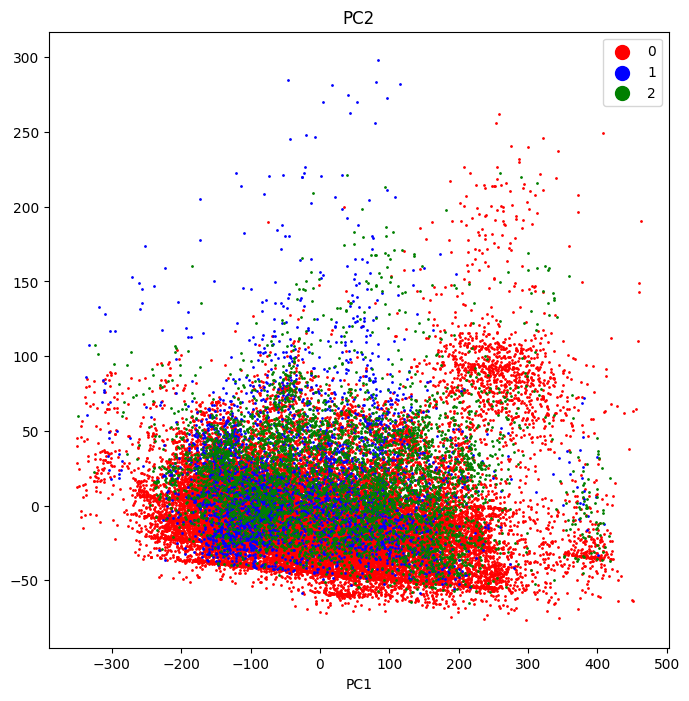

In [183]:
pca_data = pca.transform(train_data)

plt.figure(figsize=(8,8))

colors = ['red', 'blue', 'green']
for i in range(3):
    idx = train_y == i
    plt.scatter(x = pca_data[idx,0], y = pca_data[idx,1], c = colors[i] , s = 1)
plt.legend([0,1,2],markerscale = 10)
plt.xlabel('PC1')
plt.title('PC2')
plt.show()

#### 聚类尝试
看一下能否恢复原始的60个样本信息

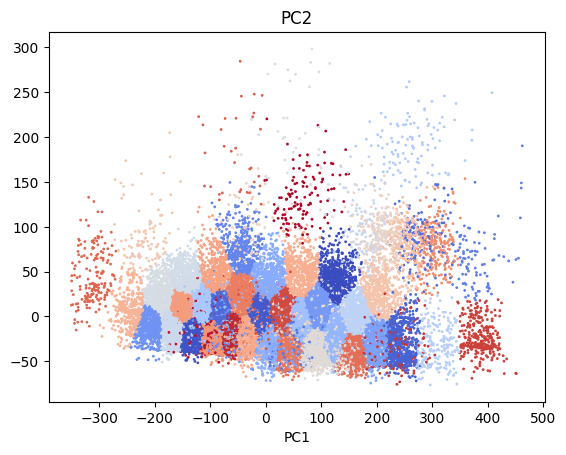

In [186]:
plt.scatter(x = pca_data[:,0], y = pca_data[:,1], c = label , s = 1,cmap='coolwarm')
#plt.legend([0,1,2],markerscale = 10)
plt.xlabel('PC1')
plt.title('PC2')
plt.show()

In [179]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=60, random_state=0, n_init="auto").fit(train_data)
label = kmeans.labels_ 

for _ in np.unique(label):
    print(f'{_} {(label == _).sum()}')

0 659
1 1354
2 1259
3 813
4 1450
5 178
6 284
7 92
8 475
9 297
10 747
11 1088
12 821
13 279
14 673
15 1412
16 1062
17 422
18 1168
19 404
20 1424
21 108
22 207
23 885
24 190
25 128
26 1123
27 871
28 783
29 42
30 1026
31 275
32 222
33 264
34 69
35 331
36 109
37 526
38 239
39 374
40 366
41 608
42 1650
43 522
44 1282
45 1278
46 229
47 316
48 981
49 1229
50 873
51 170
52 32
53 194
54 982
55 330
56 150
57 1782
58 319
59 123


### 尝试加入20个PCs做为特征

In [109]:
pca = PCA(n_components = 20)
pca.fit(train_X) 

pc_train = pca.transform(train_X)
pc_dev = pca.transform(dev_X) 

train_X = np.concatenate([train_X, pc_train], axis = 1)
dev_X = np.concatenate([dev_X, pc_dev], axis = 1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21830
[LightGBM] [Info] Number of data points in the train set: 33794, number of used features: 380
[LightGBM] [Info] Start training from score -0.230874
[LightGBM] [Info] Start training from score -2.455917
[LightGBM] [Info] Start training from score -2.117132


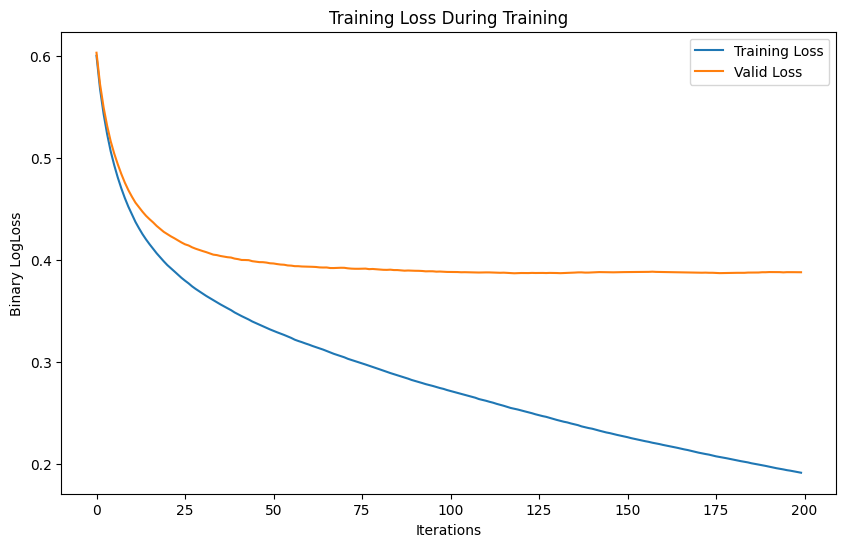

In [118]:
lgb_train = lgb.Dataset(train_X, train_label)
lgb_dev = lgb.Dataset(dev_X, dev_label, reference=lgb_train)
lgb_params = {'learning_rate': 0.1, 'max_depth': -1, 'min_child_weight': 1,
            'colsample_bytree': 1, 'subsample': 1, 'reg_lambda': 0.5, 'reg_alpha': 0.5,'num_leaves':31,
            'seed': 33,'verbose':1,  'objective':'multiclass' , 'num_class': 3}  # l1 class 8,l2 class 31

record = {}
gbm = lgb.train(lgb_params, lgb_train, num_boost_round= 200,valid_sets=[lgb_train, lgb_dev],
                callbacks=[lgb.record_evaluation(record)])

plt.figure(figsize=(10, 6))
plt.plot(list(record['training']['multi_logloss']), label='Training Loss')
plt.plot(list(record['valid_1']['multi_logloss']), label='Valid Loss')
plt.title('Training Loss During Training')
plt.xlabel('Iterations')
plt.ylabel('Binary LogLoss')
plt.legend()
plt.show()

In [119]:
res = gbm.predict(dev_X)
pred_label = np.argmax(res, axis = 1)

print(f'if pred all zero, accuracy is {(dev_label == 0).sum()/(dev_label.shape[0])}')
print(f'if pred all one, accuracy is {(dev_label == 1).sum()/(dev_label.shape[0])}')
print(f'if pred all two, accuracy is {(dev_label == 2).sum()/(dev_label.shape[0])}')

dev_true = to_one_hot(dev_label, 3)
dev_pred = to_one_hot(pred_label, 3)

from sklearn.metrics import accuracy_score, roc_auc_score 
print(f' acc score {accuracy_score(dev_label, pred_label)}')
print(f" roc_auc score {roc_auc_score(dev_true, dev_pred, average=None)}")
print(dev_pred.sum(axis = 0), dev_true.sum(axis = 0))
print(f' acc score in class 0: {accuracy_score(dev_true[:,0], dev_pred[:,0])}')
print(f' acc score in class 1: {accuracy_score(dev_true[:,1], dev_pred[:,1])}')
print(f' acc score in class 2: {accuracy_score(dev_true[:,2], dev_pred[:,2])}')

if pred all zero, accuracy is 0.7938748335552597
if pred all one, accuracy is 0.08575233022636485
if pred all two, accuracy is 0.1203728362183755
 acc score 0.8553928095872171
 roc_auc score [0.76620448 0.67798432 0.67817839]
[3256.  189.  310.] [2981.  322.  452.]
 acc score in class 0: 0.8900133155792277
 acc score in class 1: 0.9283621837549934
 acc score in class 2: 0.892410119840213


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

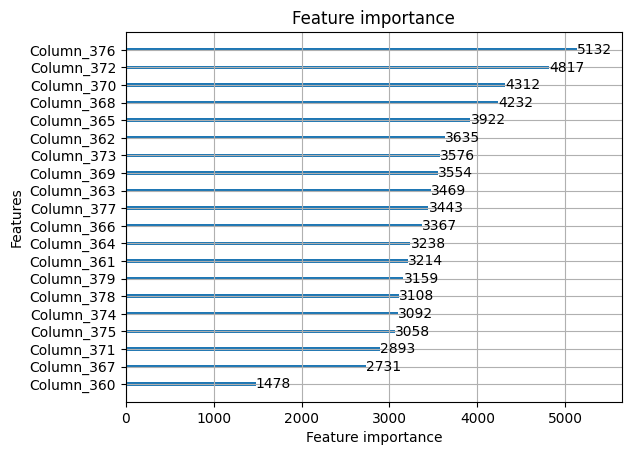

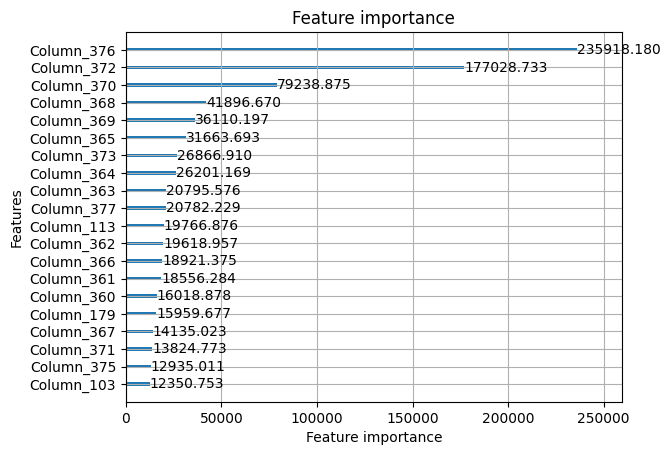

In [113]:
## 下面的图展示了使用PCs时的模型的重要性  看起来新加的特征> 360是重要的，但是性能没有提升
lgb.plot_importance(gbm, max_num_features=20)
lgb.plot_importance(gbm, max_num_features=20,importance_type= 'gain')

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

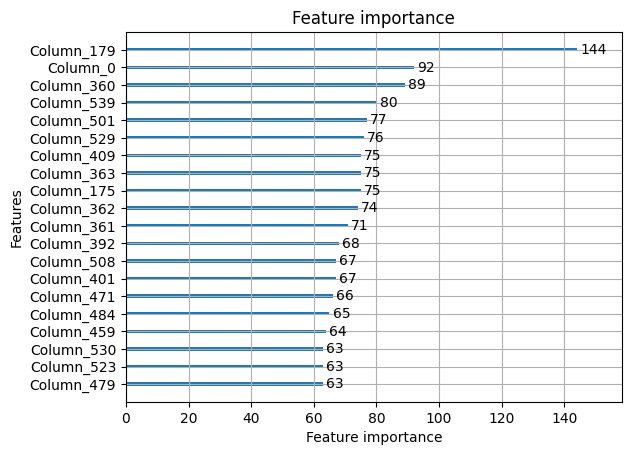

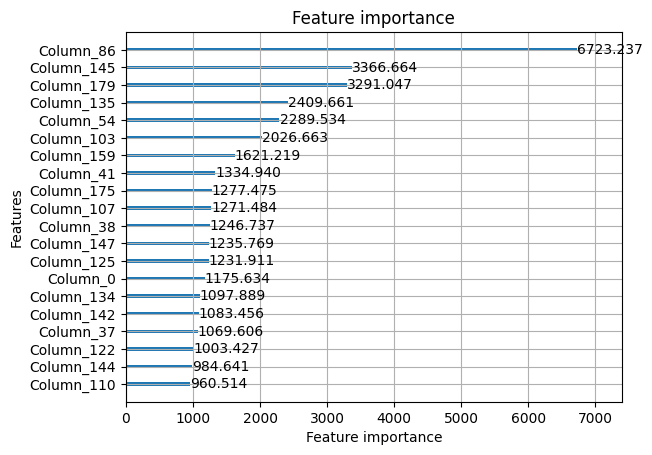

In [201]:
## 下面的图展示了不使用PCs时的模型的重要性
lgb.plot_importance(gbm, max_num_features=20)
lgb.plot_importance(gbm, max_num_features=20,importance_type= 'gain')